# Import libraries needed

In [70]:
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout,BatchNormalization
from keras import regularizers


In [71]:
#Load the dataset
data = pd.read_csv('fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [72]:
data.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


# Data preprocessing

In [73]:

# Convert pixel strings to numpy arrays
data['pixels'] = data['pixels'].apply(lambda x: np.array(x.split(), dtype='float32'))

# Normalize the pixel values
data['pixels'] = data['pixels']/ 255.0


In [74]:
data['pixels']

0        [0.27450982, 0.3137255, 0.32156864, 0.28235295...
1        [0.5921569, 0.5882353, 0.5764706, 0.60784316, ...
2        [0.90588236, 0.83137256, 0.6117647, 0.6431373,...
3        [0.09411765, 0.1254902, 0.14117648, 0.11764706...
4        [0.015686275, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
                               ...                        
35882    [0.19607843, 0.14117648, 0.06666667, 0.0862745...
35883    [0.69803923, 0.68235296, 0.6745098, 0.6784314,...
35884    [0.06666667, 0.06666667, 0.0627451, 0.09019608...
35885    [0.11764706, 0.10980392, 0.10980392, 0.1137254...
35886    [0.07450981, 0.050980393, 0.05490196, 0.047058...
Name: pixels, Length: 35887, dtype: object

# Splitting the dataset

In [75]:
# Split the dataset into training, validation, and test sets
train_data = data[data['Usage'] == 'Training']
val_data = data[data['Usage'] == 'PublicTest']
test_data = data[data['Usage'] == 'PrivateTest']


In [76]:
# Extract pixel values and emotion labels

X_train = np.stack(train_data['pixels'].values)
y_train = train_data['emotion'].values

X_val = np.stack(val_data['pixels'].values)
y_val = val_data['emotion'].values

X_test = np.stack(test_data['pixels'].values)
y_test = test_data['emotion'].values

# Adjusting the dataset shape

In [77]:
#Reshaping the images or the features so the model can use it
X_train = X_train.reshape((X_train.shape[0], 48 , 48, 1))
X_val = X_val.reshape((X_val.shape[0], 48 , 48, 1 ))
X_test = X_test.reshape((X_test.shape[0],  48 , 48, 1 ))


In [78]:
# Encode emotion labels
num_classes = 7  #7 emotion classes
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

In [79]:
X_train.shape

(28709, 48, 48, 1)

# Define the CNN model

In [80]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_49 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_50 (Batc (None, 24, 24, 128)     

c:\Users\hazem\anaconda3\envs\tf-gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# Training

In [81]:
history = model.fit(X_train, y_train, batch_size=64, epochs=16, validation_data=(X_val, y_val))

Epoch 1/16
449/449 [==============================] - 16s 33ms/step - loss: 9.1259 - accuracy: 0.2141 - val_loss: 8.4447 - val_accuracy: 0.2600
Epoch 2/16
449/449 [==============================] - 14s 32ms/step - loss: 7.8237 - accuracy: 0.2745 - val_loss: 6.9718 - val_accuracy: 0.3491
Epoch 3/16
449/449 [==============================] - 15s 33ms/step - loss: 6.5860 - accuracy: 0.3311 - val_loss: 5.8696 - val_accuracy: 0.3865
Epoch 4/16
449/449 [==============================] - 14s 32ms/step - loss: 5.5126 - accuracy: 0.3695 - val_loss: 5.0444 - val_accuracy: 0.3823
Epoch 5/16
449/449 [==============================] - 15s 32ms/step - loss: 4.6070 - accuracy: 0.4083 - val_loss: 4.1033 - val_accuracy: 0.4539
Epoch 6/16
449/449 [==============================] - 15s 33ms/step - loss: 3.8793 - accuracy: 0.4421 - val_loss: 3.4450 - val_accuracy: 0.4929
Epoch 7/16
449/449 [==============================] - 15s 33ms/step - loss: 3.2997 - accuracy: 0.4769 - val_loss: 3.0223 - val_accuracy:

# Prediction

In [85]:
#preprocess_pixels function used to extract features from the new images
def preprocess_pixels(pixels):
    pixels = pixels.astype('float32')
    pixels = pixels.reshape((1, 48, 48, 1))
    pixels = pixels / 255.0
    return pixels

In [90]:
import cv2

def classify_image(image_path):
    # Read the image file
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to the desired dimensions
    image = cv2.resize(image, (48, 48))
    
    # Convert the image into pixel values
    pixels = np.array(image)
    
    preprocessed_pixels = preprocess_pixels(pixels)
    
    # Use the preprocessed pixels to make predictions
    prediction = model.predict(preprocessed_pixels)
    
    class_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', 'Surprise']
    
    # Get the predicted class
    predicted_class_index = np.argmax(prediction)
    image_class = class_labels[predicted_class_index]
    # Convert the pixel values to an image
    image = preprocessed_pixels.reshape(48, 48)
    
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
    
    return image_class
    return image_class


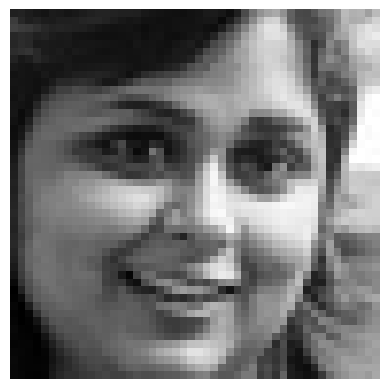

Predicted Class: Happy


In [93]:
image_path = 'test.jpg'
predicted_class = classify_image(image_path)
print('Predicted Class:', predicted_class)
